In [2]:
import copy
import datetime
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bumps

import os
import math

from numpy import exp, linspace, random
from scipy.optimize import curve_fit

# put the path here to parent folder which should include this script, the conductivity data, and meta-data
path = r"/Users/lorte/Google Drive/Python_Scripts/conductivity"

In [6]:
"""
Loading in the data and meta-data, do not edit unless necessary for os differences.
"""
# sample meta-data
info_path = path + "/Sample_Info.csv"
corrected_path = path + "/Corrected_wtPercents.csv"
sample_info = pd.read_csv(info_path)
corrected_info = pd.read_csv(corrected_path)
names = {}
cps = {}
matrix = {}
solvent_names = {}
target = {}  # target weight fraction of conjugated polymer
actual = {} # corrected weight fraction of conjugated polymer from UV-vis data

for index, row in sample_info.iterrows():
    sam_no = int(row['Sample'])
    names[sam_no] = row['Name']
    cps[sam_no] = row['Conjugated Polymer']
    matrix[sam_no] = row['Commodity Polymer']
    solvent_names[sam_no] = row['Solvent']
    # change this if target fraction is already in wt percent, rather than wt fraction
    target[sam_no] = float(row['Target Fraction'])*100
for index, row in corrected_info.iterrows():
    sam_no = int(row['Sample'])
    # change this if actual fraction is already in wt percent rather than wt fraction
    actual[sam_no] = float(row['average actual wt pct'])

In [35]:
"""
Importing conductivity data
"""

#name of the file in the folder that holds the conductivity data
conductivity_file= 'conductivity.csv'
data_path = path + '/' + conductivity_file

#importing into dictionary: {sampleno:measurement}
con_data = {}
file = open(data_path, 'r')
the_lines = file.readlines()[1:]
for each in the_lines:
    split_line = each.split(",")
    if split_line[4][:-1] != 'None':
        con_data[int(split_line[0])] = float(split_line[4][:-1])

In [43]:
# useful dictionaries with labels and colors for the plots and their legends
wt_names = {} 
full_names = {}

wt_colors = {}
solvent_colors = {}
cp_colors = {}

rep_colors = {}
rep_names = {}

fraction = {}

temp_wt_colors = {
    0.1: 'firebrick',
    0.5: 'darkorange',
    1.0: 'darkcyan',
    5.0: 'mediumblue',
    10.0: 'deeppink',
    25.0: 'darkorchid',
    50.0: 'forestgreen',
    0.0: 'black'
}

temp_solvent_colors = {
    'Chloroform': 'firebrick',
    'Bromobenzene': 'darkorange',
    'Toluene': 'darkcyan',
    'Slow Dry Chloroform': 'darkorchid'
}

temp_cp_colors = {
    'RRe-P3HT': 'firebrick',
    'RRa-P3HT': 'darkorange',
    'P3DDT': 'darkorchid',
    'PQT-12': 'darkcyan',
    'None': 'black'
}

cp_marks = {
    'RRe-P3HT': 'o',
    'RRa-P3HT': '^',
    'P3DDT': 's',
    'PQT-12': 'D',
}

for key in names.keys():
    if key in actual.keys():
        frac = actual[key]
        fraction[key] = actual[key]
    else:
        frac = target[key]
        fraction[key] = target[key]
    frac = np.round(frac,2)
    
    if cps[key] == 'None':
        wt_names[key] = matrix[key] + ' Control'
        full_names[key] = matrix[key] + ' Control'
    else:
        wt_names[key] = str(frac) + ' wt% ' + cps[key]
        full_names[key] = str(frac) + ' wt% ' + cps[key] + ' in ' + matrix[key]
        
for key in cps.keys():
    wt_colors[key] = temp_wt_colors[target[key]]
    solvent_colors[key] = temp_solvent_colors[solvent_names[key]]
    cp_colors[key] = temp_cp_colors[cps[key]]

solubility = {}
solubility['Bromobenzene'] = 84.1
solubility['Chloroform'] = 14.1
solubility['Toluene'] = 0.7
solubility['Slow Dry Chloroform'] = 14.1

polarity = {}
polarity['Bromobenzene'] = 5.17
polarity['Chloroform'] = 4.81
polarity['Toluene'] = 2.38
polarity['Slow Dry Chloroform'] = 4.81

figure_path = path +'/figures'
if 'figures' in os.listdir(path):
    print('figures path already exists')
else:
    os.mkdir(figure_path)

figures path already exists


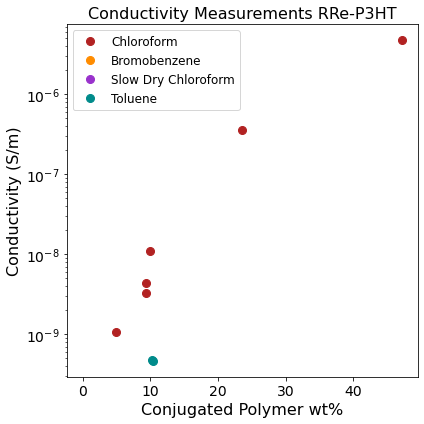

In [51]:
samplelist = []
for num in con_data:
    if cps[num] == 'RRe-P3HT':
        samplelist.append(num)

name_of_figure = 'conductivity of all RRe-P3HT'
filename = figure_path + '/' + name_of_figure
plt.figure(figsize=(6,6))
for num in samplelist:
    x = fraction[num]
    y = con_data[num]
    plt.errorbar(x, y, fmt=cp_marks[cps[num]] , c = solvent_colors[num], ms=8)


plt.errorbar([0],[0],fmt = 'o',label='Chloroform', c= temp_solvent_colors['Chloroform'],ms=8)
plt.errorbar([0],[0],fmt = 'o',label='Bromobenzene', c= temp_solvent_colors['Bromobenzene'],ms=8)
plt.errorbar([0],[0],fmt = 'o',label='Slow Dry Chloroform', c= temp_solvent_colors['Slow Dry Chloroform'],ms=8)
plt.errorbar([0],[0],fmt = 'o',label='Toluene', c= temp_solvent_colors['Toluene'],ms=8)        
   
plt.xlabel('Conjugated Polymer wt%', fontsize=16)
plt.ylabel('Conductivity (S/m)', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xscale('log')
plt.yscale('log')

plt.title('Conductivity Measurements RRe-P3HT',fontsize=16)

plt.legend(fontsize=12,loc='upper left',title=None, title_fontsize=12)# ncol=3)

plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')

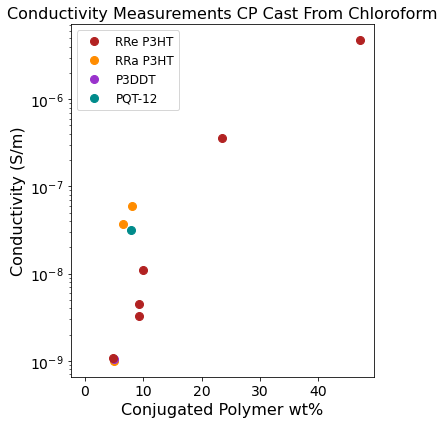

In [53]:
samplelist = []
for num in con_data:
    if solvent_names[num] == 'Chloroform':
        samplelist.append(num)

name_of_figure = 'conductivity of all chloroform'
filename = figure_path + '/' + name_of_figure
plt.figure(figsize=(6,6))
label_counter = []
for num in samplelist:
    x = fraction[num]
    y = con_data[num]
    plt.errorbar(x, y, fmt='o' , c = cp_colors[num], ms=8)


plt.errorbar([0],[0],fmt='o',label='RRe P3HT', c = temp_cp_colors['RRe-P3HT'],ms=8)
plt.errorbar([0],[0],fmt='o',label='RRa P3HT', c = temp_cp_colors['RRa-P3HT'],ms=8)
plt.errorbar([0],[0],fmt='o',label='P3DDT', c = temp_cp_colors['P3DDT'],ms=8)
plt.errorbar([0],[0],fmt='o',label='PQT-12', c = temp_cp_colors['PQT-12'],ms=8)        
   
plt.xlabel('Conjugated Polymer wt%', fontsize=16)
plt.ylabel('Conductivity (S/m)', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xscale('log')
plt.yscale('log')

plt.title('Conductivity Measurements CP Cast From Chloroform',fontsize=16)

plt.legend(fontsize=12,loc='upper left',title=None, title_fontsize=12)# ncol=3)

plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')